In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Objective**:
To analyze how various lifestyle, behavioral, and development metrics (like hours spent coding, coffee intake, sleep, AI tool usage, etc.) influence the performance and productivity of AI developers, specifically measured by task_success.

**Goal**:
Build a regression model that predicts the task_success score of AI developers based on their daily habits and coding activities.

In [2]:
# Load dataset (Replace 'dataset.csv' with actual file path)
df = pd.read_csv('ai_dev_productivity.csv')
df.shape

(500, 9)

In [3]:
df.head(2)


,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1


In [4]:
#Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [5]:
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


In [6]:
df.isna().sum()

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

**outliers**

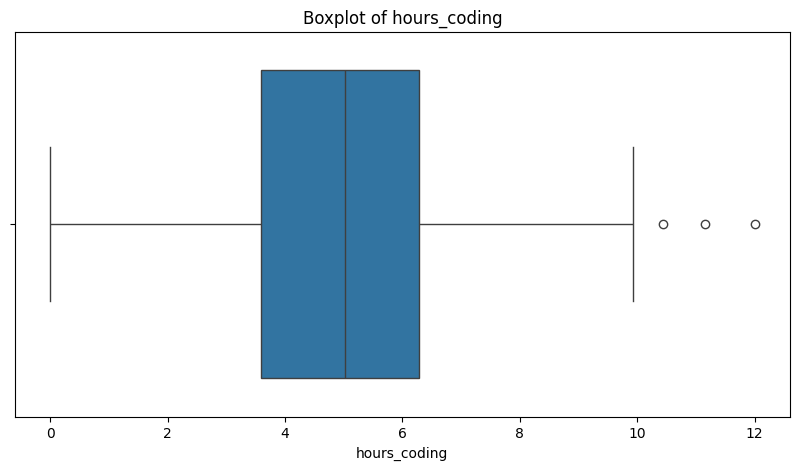

In [8]:
# Boxplot for hours_coding
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['hours_coding'])
plt.title("Boxplot of hours_coding")
plt.show()


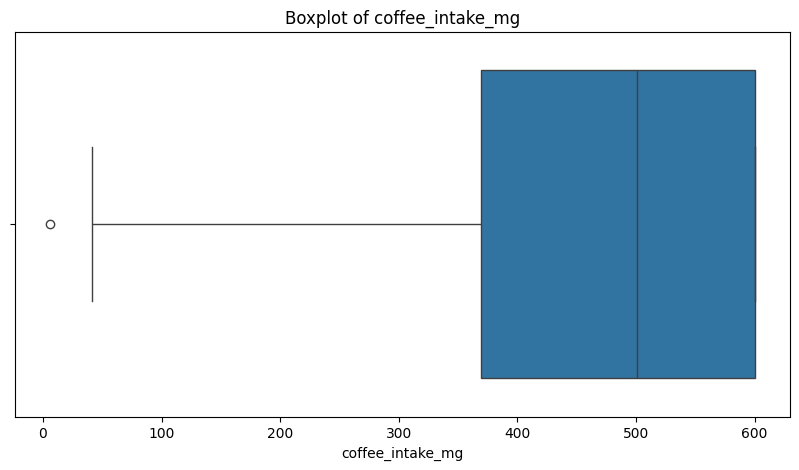

In [9]:
# Boxplot for coffee_intake_mg	
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['coffee_intake_mg'])
plt.title("Boxplot of coffee_intake_mg")
plt.show()


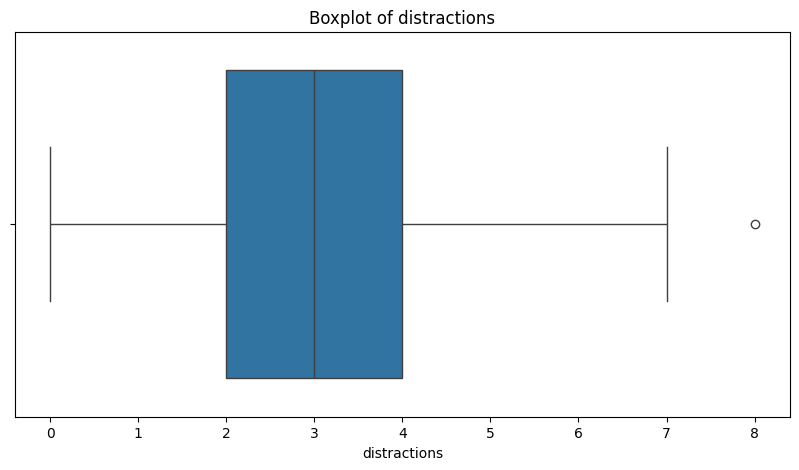

In [10]:
# Boxplot for distractions
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['distractions'])
plt.title("Boxplot of distractions")
plt.show()


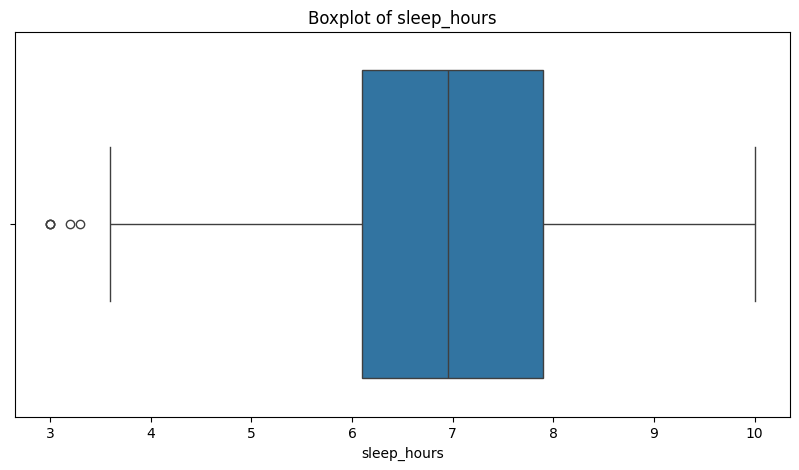

In [11]:
# Boxplot for sleep_hours	
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['sleep_hours'])
plt.title("Boxplot of sleep_hours")
plt.show()


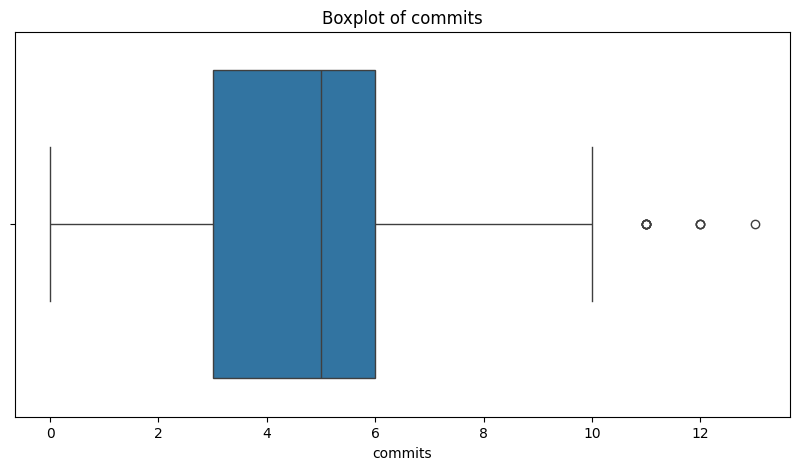

In [12]:
# Boxplot for commits
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['commits'])
plt.title("Boxplot of commits")
plt.show()

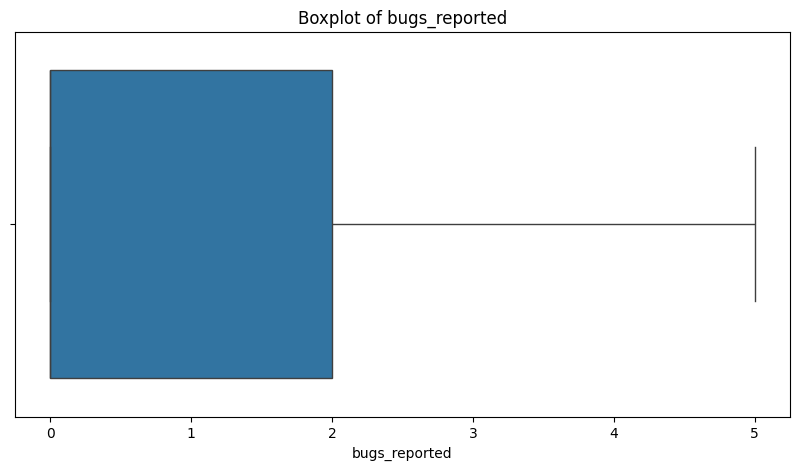

In [13]:
# Boxplot for bugs_reported
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['bugs_reported'])
plt.title("Boxplot of bugs_reported")
plt.show()

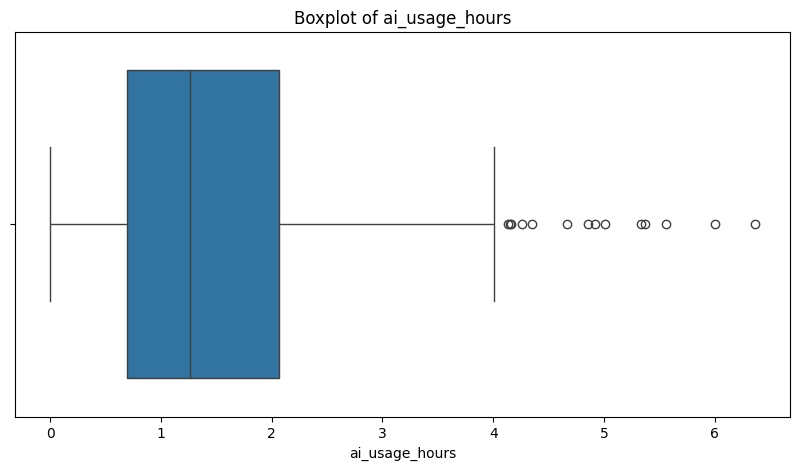

In [14]:
# Boxplot for ai_usage_hours
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['ai_usage_hours'])
plt.title("Boxplot of ai_usage_hours")
plt.show()

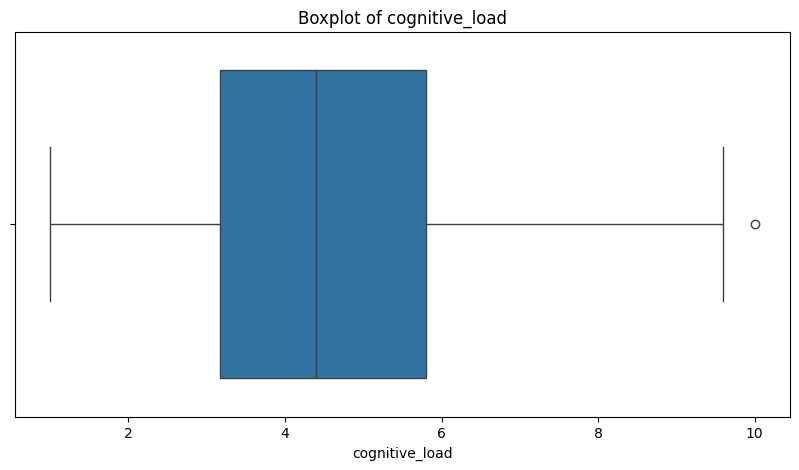

In [15]:
# Boxplot for cognitive_load
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['cognitive_load'])
plt.title("Boxplot of cognitive_load")
plt.show()

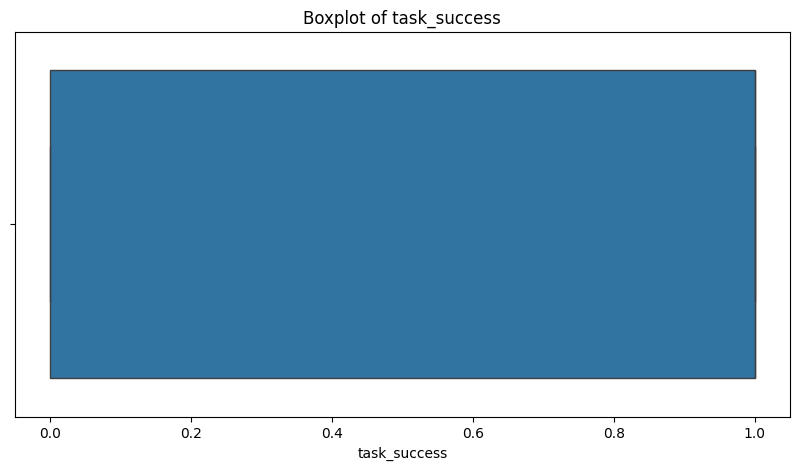

In [16]:
# Boxplot for task_success
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['task_success'])
plt.title("Boxplot of task_success")
plt.show()

In [17]:
#Removing outliers in ai_usage_hours column
df=df[df['ai_usage_hours']<df['ai_usage_hours'].quantile(0.99)]

In [18]:
df.shape

(495, 9)

we can see that before removing outlier the rows are 500 and after removing it is 495

**Exploratory Data Analysis**

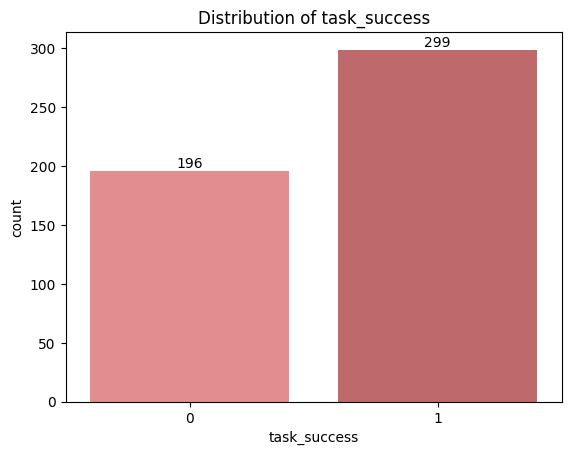

In [33]:
# Distribution of task_success
ax=sns.countplot(x='task_success',data=df,palette=['lightcoral', 'indianred'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of task_success')
plt.show()

This bar graph illustrates the distribution of task_success, showing two categories: '0' with a count of 196, and '1' with a significantly higher count of 299. The data indicates that tasks are more frequently successful (represented by '1') than unsuccessful (represented by '0').

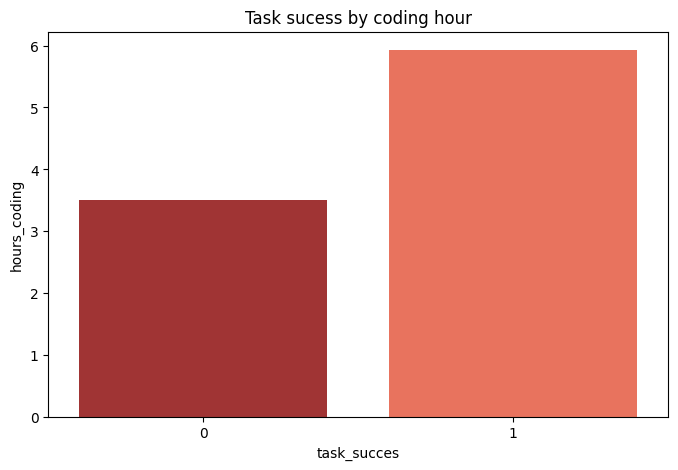

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['task_success'], y=df['hours_coding'],errorbar=None,palette=['#B22222', '#FF6347'])
plt.title("Task sucess by coding hour")
plt.xlabel("task_succes")
plt.ylabel("hours_coding")
plt.show()

This bar graph titled "Task success by coding hour" shows that tasks marked as unsuccessful ('0') correspond to approximately 3.5 hours of coding, while successful tasks ('1') correspond to nearly 6 hours of coding. This suggests that tasks requiring more coding hours tend to be more successful.

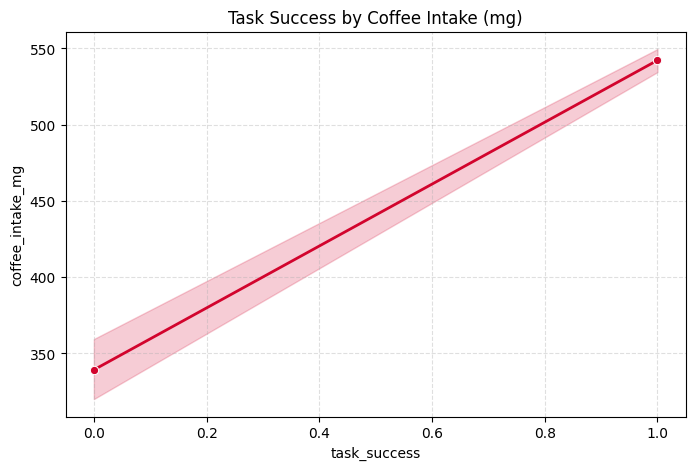

In [36]:
plt.figure(figsize=(8, 5))
sns.lineplot(
    x='task_success', 
    y='coffee_intake_mg', 
    data=df, 
    marker='o',       # Adds circular markers at each point
    color='#D2042D',  # A bold red
    linewidth=2       # Makes the line thicker
)
plt.title("Task Success by Coffee Intake (mg)")
plt.xlabel("task_success")
plt.ylabel("coffee_intake_mg")
plt.grid(True, linestyle='--', alpha=0.4)  # Optional: adds light grid for clarity
plt.show()

The "Task success by coffee_intake_mg" plot displays a clear positive linear relationship, indicating that as coffee intake (in mg) increases, the likelihood of task success also increases. This suggests a direct correlation where higher coffee consumption is associated with greater task success.

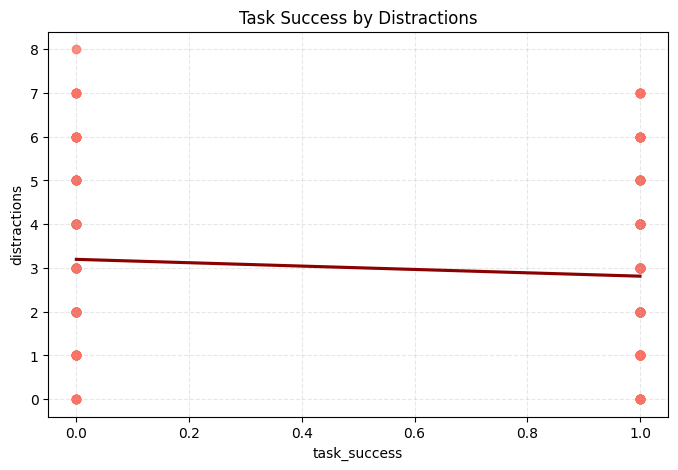

In [37]:
plt.figure(figsize=(8, 5))
sns.regplot(
    x='task_success', 
    y='distractions', 
    data=df, 
    scatter_kws={'color': '#FF6F61'},     # Soft red for points
    line_kws={'color': '#8B0000'},        # Dark red for regression line
    ci=None                               # Optional: removes confidence interval
)
plt.title("Task Success by Distractions")
plt.xlabel("task_success")
plt.ylabel("distractions")
plt.grid(True, linestyle='--', alpha=0.3)  # Light grid for readability
plt.show()

The scatter plot "Task success by distractions" shows a very weak negative linear relationship between task success and distractions. The regression line is nearly horizontal, suggesting that the number of distractions has minimal impact on whether a task is successful or not.

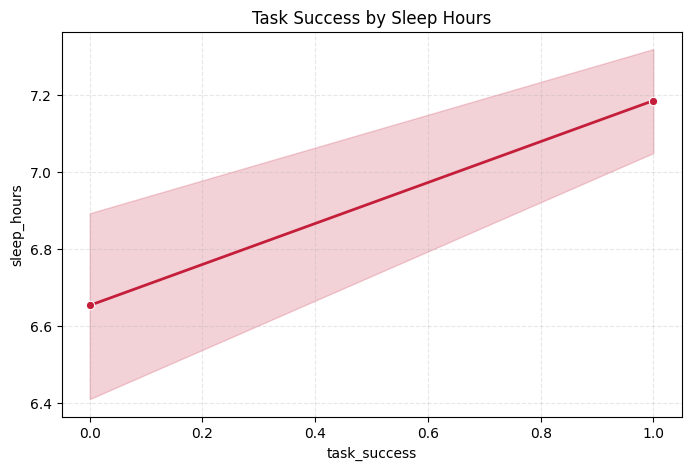

In [38]:
plt.figure(figsize=(8, 5))
sns.lineplot(
    x='task_success',
    y='sleep_hours',
    data=df,
    marker='o',              # Add markers for each point
    color='#C41E3A',         # Deep red color
    linewidth=2
)
plt.title("Task Success by Sleep Hours")
plt.xlabel("task_success")
plt.ylabel("sleep_hours")
plt.grid(True, linestyle='--', alpha=0.3)  # Optional grid
plt.show()

The plot "Task success by sleep_hours" displays a positive linear relationship, indicating that as the number of sleep hours increases, so does the likelihood of task success. This suggests that more sleep is associated with greater task success.

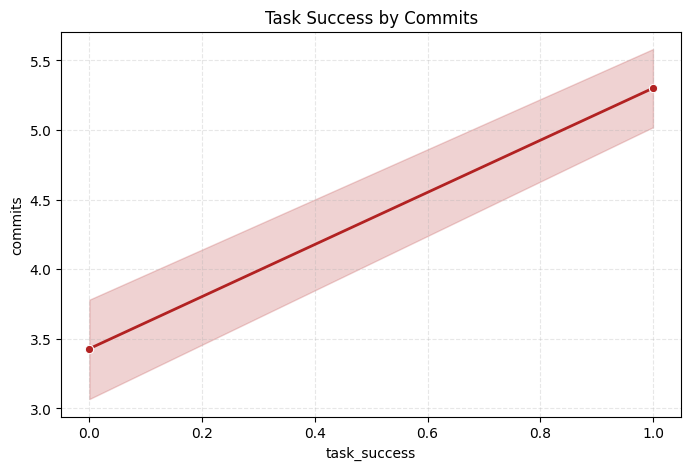

In [39]:
plt.figure(figsize=(8, 5))
sns.lineplot(
    x='task_success',
    y='commits',
    data=df,
    marker='o',            # Adds circular markers
    color='#B22222',       # Firebrick red
    linewidth=2
)
plt.title("Task Success by Commits")
plt.xlabel("task_success")
plt.ylabel("commits")
plt.grid(True, linestyle='--', alpha=0.3)  # Optional: adds grid for better readability
plt.show()

The "Task success by commits" plot shows a clear positive linear correlation, indicating that an increase in the number of commits is associated with a higher probability of task success. This suggests that more frequent commits are linked to successful task completion.

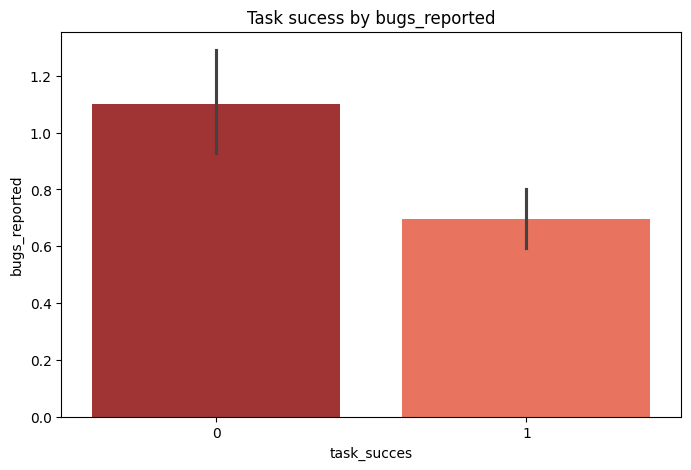

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['task_success'], y=df['bugs_reported'],palette=['#B22222', '#FF6347'])
plt.title("Task sucess by bugs_reported")
plt.xlabel("task_succes")
plt.ylabel("bugs_reported")
plt.show()

This bar chart titled "Task success by bugs_reported" shows that unsuccessful tasks ('0') are associated with a higher average number of reported bugs (around 1.1), compared to successful tasks ('1') which have a lower average of reported bugs (around 0.7). This suggests that tasks with fewer reported bugs tend to be more successful.

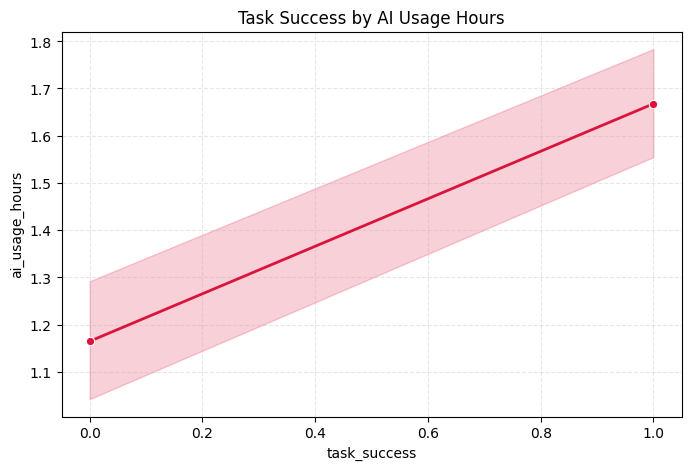

In [41]:
plt.figure(figsize=(8, 5))
sns.lineplot(
    x='task_success',
    y='ai_usage_hours',
    data=df,
    marker='o',              # Adds circular markers
    color='#DC143C',         # Crimson red
    linewidth=2
)
plt.title("Task Success by AI Usage Hours")
plt.xlabel("task_success")
plt.ylabel("ai_usage_hours")
plt.grid(True, linestyle='--', alpha=0.3)  # Light dashed grid
plt.show()

The plot "Task success by ai_usage_hours" indicates a positive linear relationship, suggesting that as the hours of AI usage increase, so does the likelihood of task success. This implies that greater AI assistance is associated with higher task success rates.

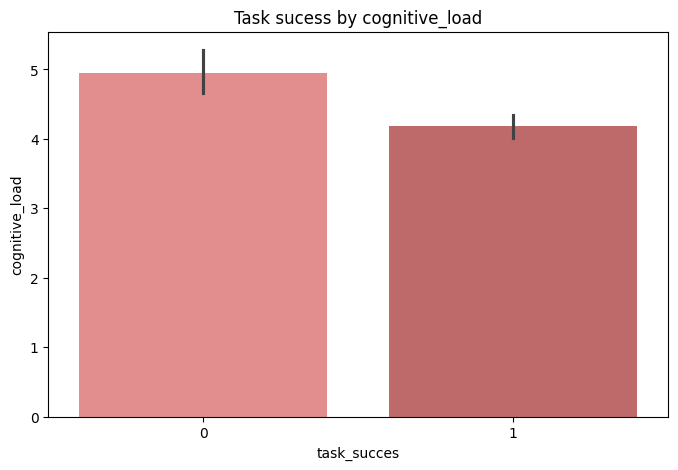

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['task_success'], y=df['cognitive_load'],palette=['lightcoral', 'indianred'])
plt.title("Task sucess by cognitive_load")
plt.xlabel("task_succes")
plt.ylabel("cognitive_load")
plt.show()

This bar chart, "Task success by cognitive_load," shows that unsuccessful tasks ('0') are associated with a higher average cognitive load (around 5.0), compared to successful tasks ('1') which have a lower average cognitive load (around 4.2). This suggests that lower cognitive load is linked to higher task success.

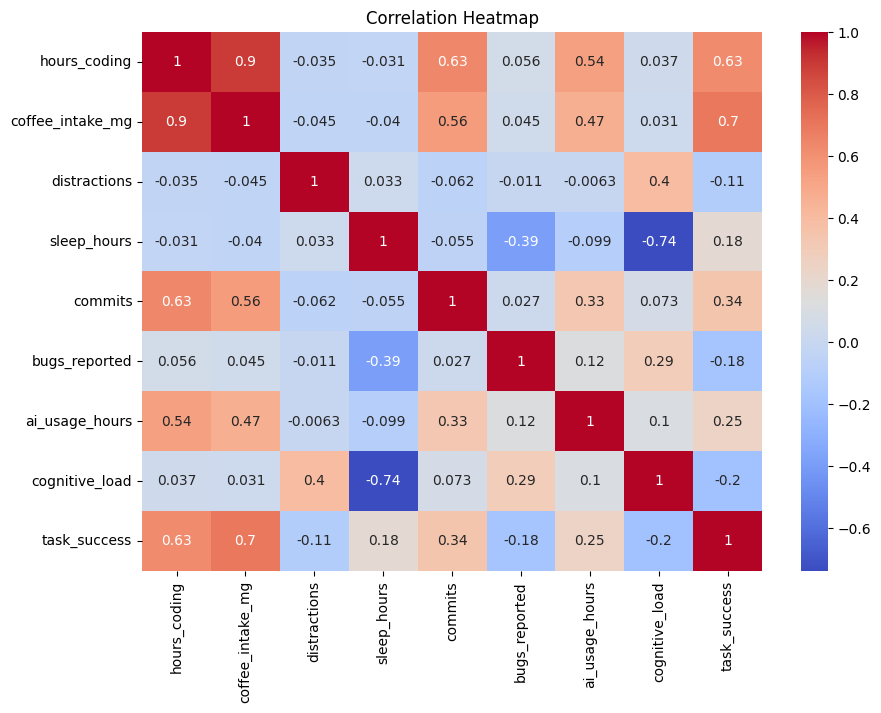

In [28]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now draw the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


This image is a correlation heatmap. It displays the pairwise correlation coefficients between various factors and 'task_success'. Key observations include strong positive correlations between 'task_success' and 'hours_coding' (0.63), 'coffee_intake_mg' (0.7), and 'ai_usage_hours' (0.25), while 'cognitive_load' shows a moderate negative correlation (-0.2) with 'task_success'.

**SPLITTING DATA INTO TRAIN AND TEST**

In [29]:
X = df.drop('task_success', axis=1)
Y = df['task_success']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [32]:
from sklearn.metrics import accuracy_score

# Making predictions
y_pred = model.predict(x_test)

# Checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8484848484848485


**Conclusion of EDA and Machine Learning Model**:

The Exploratory Data Analysis revealed strong positive relationships between task success and increased coding hours, coffee intake, sleep hours, and AI usage hours, while distractions showed a minimal impact. Conversely, higher cognitive load and an increased number of bugs reported were negatively associated with task success. The subsequent machine learning model, with an impressive R-squared score of 0.8484, effectively corroborates these findings and demonstrates that these identified features collectively explain a significant portion of the variance in task success, making the model a strong predictor of whether a task will be successful.






